In [1]:
import xarray as xr
import numpy as np
# import pandas as pd
from matplotlib import pyplot as plt
import glob

In [2]:
# from netCDF4 import Dataset
# import os
# folder = r'C:\Users\salla\Onedrive(uoft acc)\OneDrive - University of Toronto\Desktop\School Information\NSERC\PEARL FTIR O3'
# files = glob.glob(folder + r'\*.hdf')
# output_folder = os.path.join(folder, 'netcdf_out')
# os.makedirs(output_folder, exist_ok=True)


# for file in files:
#     with Dataset(file, "r") as f:
#         output_file = os.path.basename(file) + ".nc"
#         cdf_file = os.path.join(output_folder, output_file)
#         with Dataset(cdf_file, "w", format="NETCDF4") as dst:
#             for attr in f.ncattrs():
#                 dst.setncattr(attr, f.getncattr(attr))

#             idx_len = int(str(list(f.dimensions.values())[0]).split()[-1])
#             dst.createDimension("altitude2", 47)
#             dst.createDimension("altitude1", 47)
#             dst.createDimension("single", 1)
#             dst.createDimension("source", 103)
#             dst.createDimension("two", 2)
#             dst.createDimension("idx", idx_len)
#             dst.createDimension("DATETIME", idx_len)

#             altitude1_var = dst.createVariable("altitude1", "i4", ("altitude1",))
#             altitude1_var[:] = f["ALTITUDE"][:]

#             vars = list(f.variables)
#             for var in vars:
#                 cdf_dims = []
#                 dims = f[var].dimensions
#                 if len(dims) > 2:
#                     cdf_dims.append("idx")
#                     cdf_dims.append("altitude1")
#                     cdf_dims.append("altitude2")
#                 else:
#                     for dim in dims:
#                         dim_len = len(f.dimensions[dim])
#                         if dim_len == idx_len:        
#                             cdf_dims.append("idx")
#                         elif dim_len == 2:
#                             cdf_dims.append("two")
#                         elif dim_len == 1:
#                             cdf_dims.append("single")
#                         elif dim_len == 103:
#                             cdf_dims.append("source")
#                         else:
#                             cdf_dims.append("altitude1")
#                 cdf_var = dst.createVariable(var, f[var].datatype, tuple(cdf_dims))
#                 for attr in f[var].ncattrs():
#                     if attr == "_FillValue":
#                         continue
#                     cdf_var.setncattr(attr, f[var].getncattr(attr))
#                 cdf_var[:] = f[var][:]

#             dst["DATETIME"].setncattr("units", "days since 2000-01-01 00:00:00")
#             dst["DATETIME"].setncattr("standard_name", "time")
#             dst["DATETIME"].setncattr("calendar", "standard")

In [3]:
directory = r'C:\Users\salla\Onedrive(uoft acc)\OneDrive - University of Toronto\Desktop\School Information\NSERC\NSERC\PEARL FTIR O3\netcdf_out'

path = directory + r'\*.nc'

nc_list = glob.glob(path)

f = xr.open_mfdataset(
    nc_list,
    combine="nested",
    concat_dim="idx",
    parallel=True,
    decode_cf=True
)

In [4]:
f = f.swap_dims({"idx": "DATETIME"})
f = f.sortby("DATETIME")

In [5]:
midpoints = np.mean(f["ALTITUDE.BOUNDARIES"][0].values, axis=0)
f = f.assign_coords(altitude1=('altitude1', midpoints))
f = f.sortby("altitude1")

In [6]:
midpoints

array([113.       , 100.25     ,  89.85     ,  81.1      ,  73.384995 ,
        66.585    ,  60.59     ,  55.315    ,  50.699997 ,  46.68     ,
        43.190002 ,  40.17     ,  37.555    ,  35.285    ,  33.3      ,
        31.529999 ,  29.915    ,  28.4      ,  26.939999 ,  25.515    ,
        24.125    ,  22.77     ,  21.45     ,  20.17     ,  18.925    ,
        17.715    ,  16.54     ,  15.4      ,  14.3      ,  13.235001 ,
        12.205    ,  11.21     ,  10.25045  ,   9.332251 ,   8.4508   ,
         7.6061   ,   6.7982   ,   6.0271   ,   5.2978   ,   4.6052504,
         3.94945  ,   3.33045  ,   2.74825  ,   2.2078   ,   1.7040999,
         1.2372   ,   0.8121   ], dtype=float32)

In [11]:
f

<xarray.Dataset> Size: 180MB
Dimensions:                                                                    (
                                                                                DATETIME: 6261,
                                                                                single: 1,
                                                                                altitude1: 47,
                                                                                two: 2,
                                                                                altitude2: 47)
Coordinates:
  * DATETIME                                                                   (DATETIME) datetime64[ns] 50kB ...
  * altitude1                                                                  (altitude1) float32 188B ...
Dimensions without coordinates: single, two, altitude2
Data variables: (12/27)
    LATITUDE.INSTRUMENT                                                        (DATETIME, single) float32 25kB dask.array<chunksize=(81, 1), meta=np.ndarray>
    LONGITUDE.INSTRUMENT                                                       (DATETIME, single) float32 25kB dask.array<chunksize=(81, 1), meta=np.ndarray>
    ALTITUDE.INSTRUMENT                                                        (DATETIME, single) float32 25kB dask.array<chunksize=(81, 1), meta=np.ndarray>
    SURFACE.PRESSURE_INDEPENDENT                                               (DATETIME) float32 25kB dask.array<chunksize=(81,), meta=np.ndarray>
    SURFACE.TEMPERATURE_INDEPENDENT                                            (DATETIME) float32 25kB dask.array<chunksize=(81,), meta=np.ndarray>
    ALTITUDE                                                                   (DATETIME, altitude1) float32 1MB dask.array<chunksize=(81, 47), meta=np.ndarray>
    ...                                                                         ...
    O3.COLUMN_ABSORPTION.SOLAR_UNCERTAINTY.SYSTEMATIC.STANDARD                 (DATETIME) float32 25kB dask.array<chunksize=(81,), meta=np.ndarray>
    ANGLE.SOLAR_ZENITH.ASTRONOMICAL                                            (DATETIME) float32 25kB dask.array<chunksize=(81,), meta=np.ndarray>
    ANGLE.SOLAR_AZIMUTH                                                        (DATETIME) float32 25kB dask.array<chunksize=(81,), meta=np.ndarray>
    H2O.MIXING.RATIO.VOLUME_ABSORPTION.SOLAR                                   (DATETIME, altitude1) float32 1MB dask.array<chunksize=(81, 47), meta=np.ndarray>
    H2O.COLUMN_ABSORPTION.SOLAR                                                (DATETIME) float32 25kB dask.array<chunksize=(81,), meta=np.ndarray>
    SOURCE.PRODUCT                                                             (DATETIME, single) |S103 645kB dask.array<chunksize=(81, 1), meta=np.ndarray>
Attributes: (12/34)
    PI_NAME:               Strong;Kimberly
    PI_AFFILIATION:        University of Toronto;UTORONTO
    PI_ADDRESS:            MP710A, 60 St. George Street;Toronto, Ontario M5S ...
    PI_EMAIL:              strong@atmosp.physics.utoronto.ca
    DO_NAME:               Strong;Kimberly
    DO_AFFILIATION:        University of Toronto;UTORONTO
    ...                    ...
    FILE_GENERATION_DATE:  20241004T054106Z
    FILE_ACCESS:           NDACC
    FILE_PROJECT_ID:       CAMS27
    FILE_DOI:               
    FILE_ASSOCIATION:      NDACC
    FILE_META_VERSION:     04R088;IDLCR8HDF

In [7]:
f["ALTITUDE.BOUNDARIES"][0].values

array([[  1.0142,   1.4602,   1.948 ,   2.4676,   3.0289,   3.632 ,
          4.2669,   4.9436,   5.652 ,   6.4022,   7.1942,   8.018 ,
          8.8836,   9.7809,  10.72  ,  11.7   ,  12.71  ,  13.76  ,
         14.84  ,  15.96  ,  17.12  ,  18.31  ,  19.54  ,  20.8   ,
         22.1   ,  23.44  ,  24.81  ,  26.22  ,  27.66  ,  29.14  ,
         30.69  ,  32.37  ,  34.23  ,  36.34  ,  38.77  ,  41.57  ,
         44.81  ,  48.55  ,  52.85  ,  57.78  ,  63.4   ,  69.77  ,
         77.    ,  85.2   ,  94.5   , 106.    , 120.    ],
       [  0.61  ,   1.0142,   1.4602,   1.948 ,   2.4676,   3.0289,
          3.632 ,   4.2669,   4.9436,   5.652 ,   6.4022,   7.1942,
          8.018 ,   8.8836,   9.7809,  10.72  ,  11.7   ,  12.71  ,
         13.76  ,  14.84  ,  15.96  ,  17.12  ,  18.31  ,  19.54  ,
         20.8   ,  22.1   ,  23.44  ,  24.81  ,  26.22  ,  27.66  ,
         29.14  ,  30.69  ,  32.37  ,  34.23  ,  36.34  ,  38.77  ,
         41.57  ,  44.81  ,  48.55  ,  52.85  ,  57.78  ,

In [8]:
O3_vmr = f["O3.MIXING.RATIO.VOLUME_ABSORPTION.SOLAR"] * 1e-6
O3_times = O3_vmr.sel(DATETIME = slice("2006-01-01", "2020-12-31"))
latitude = 80.05
longitude = -86.42
altitude1 = O3_times["altitude1"].values

In [9]:
temperature = f["TEMPERATURE_INDEPENDENT"]
pressure = f["PRESSURE_INDEPENDENT"] * 100
k = 1.380649e-23
O3_density = O3_vmr * pressure/(k * temperature)
# vmr - mol o3/mol air
# mol o3/mol air * mol air/vol air = num density = vmr * mol air/vol air = mol o3/vol air in molecules/m^3
# mol air/vol air = N/V
# PV = NkT
# N/V = P/kT
# num density = vmr * N/V = vmr * P/kT
# column = num density*altitude diff

In [10]:
has_fig = ((O3_times * pressure/(k * temperature)).groupby("DATETIME.month").mean(dim  = "DATETIME") * 10**6).plot(col = "month", col_wrap = 3, y = "altitude1")
has_fig.fig.axes[0].set_ylabel("Altitude (km)")
has_fig.fig.axes[3].set_ylabel("Altitude (km)")
has_fig.fig.axes[6].set_ylabel("Altitude (km)")
has_fig.fig.axes[6].set_xlabel("O$_3$ VMR")
has_fig.fig.axes[7].set_xlabel("O$_3$ VMR")
has_fig.fig.axes[8].set_xlabel("O$_3$ VMR")

plt.suptitle("Mean O₃ VMR by Months (2006-2020)", y = 1.025)

month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

for i, ax in enumerate(has_fig.axes.flat):
    ax.set_title(month_names[i + 1])

title = has_fig.fig._suptitle.get_text()
has_fig.fig.savefig(title, bbox_inches="tight")

KeyboardInterrupt: 

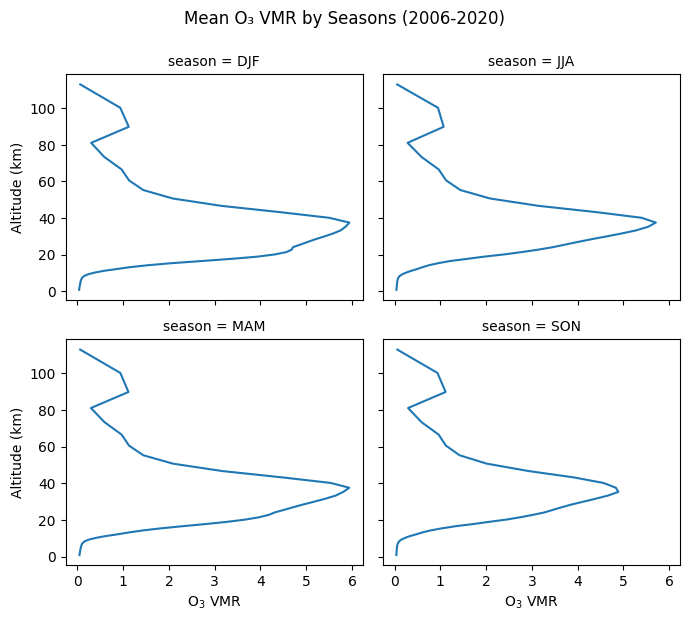

In [ ]:
has_fig = (O3_times.groupby("DATETIME.season").mean(dim  = "DATETIME") * 10**6).plot(col = "season", col_wrap = 2, y = "altitude1")
has_fig.fig.axes[0].set_ylabel("Altitude (km)")
has_fig.fig.axes[2].set_ylabel("Altitude (km)")
has_fig.fig.axes[2].set_xlabel("O$_3$ VMR")
has_fig.fig.axes[3].set_xlabel("O$_3$ VMR")

plt.suptitle("Mean O₃ VMR by Seasons (2006-2020)", y = 1.05)

title = has_fig.fig._suptitle.get_text()
has_fig.fig.savefig(title, bbox_inches="tight")

In [ ]:
altitude1

array([  0.8121   ,   1.2372   ,   1.7040999,   2.2078   ,   2.74825  ,
         3.33045  ,   3.94945  ,   4.6052504,   5.2978   ,   6.0271   ,
         6.7982   ,   7.6061   ,   8.4508   ,   9.332251 ,  10.25045  ,
        11.21     ,  12.205    ,  13.235001 ,  14.3      ,  15.4      ,
        16.54     ,  17.715    ,  18.925    ,  20.17     ,  21.45     ,
        22.77     ,  24.125    ,  25.515    ,  26.939999 ,  28.4      ,
        29.915    ,  31.529999 ,  33.3      ,  35.285    ,  37.555    ,
        40.17     ,  43.190002 ,  46.68     ,  50.699997 ,  55.315    ,
        60.59     ,  66.585    ,  73.384995 ,  81.1      ,  89.85     ,
       100.25     , 113.       ], dtype=float32)

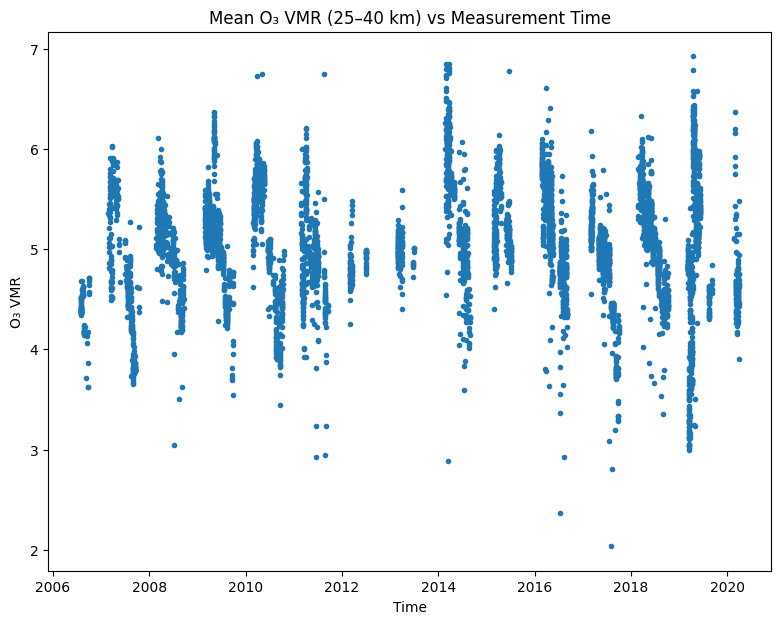

In [ ]:
(O3_times.sel(altitude1 = slice(25, 40)).mean(dim = "altitude1") * 10**6).plot(marker = ".", linestyle = "None", size = 7)

plt.ylabel("O₃ VMR")
plt.xlabel("Time")
plt.title("Mean O₃ VMR (25–40 km) vs Measurement Time")

fig = plt.gcf()
axes = plt.gca()

title = axes.get_title()
fig.savefig(title, bbox_inches="tight")

c:\Program Files\Python312\Lib\site-packages\xarray\groupers.py:498: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(


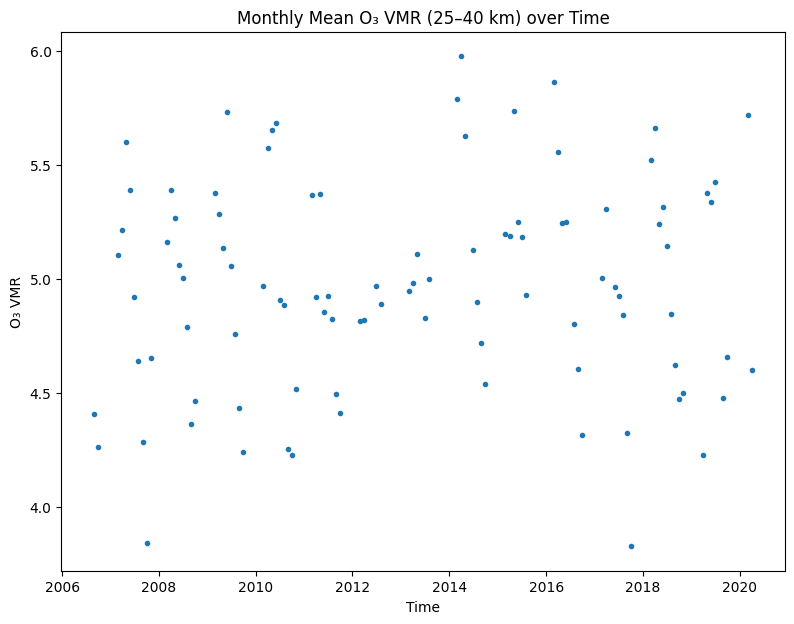

In [ ]:
(O3_times.sel(altitude1 = slice(25, 40)).resample(DATETIME = "1M").mean(dim = ["altitude1", "DATETIME"]) * 10**6).plot(marker = ".", linestyle = "None", size = 7)

plt.ylabel("O₃ VMR")
plt.xlabel("Time")
plt.title("Monthly Mean O₃ VMR (25–40 km) over Time")

fig = plt.gcf()
axes = plt.gca()

title = axes.get_title()
fig.savefig(title, bbox_inches="tight")

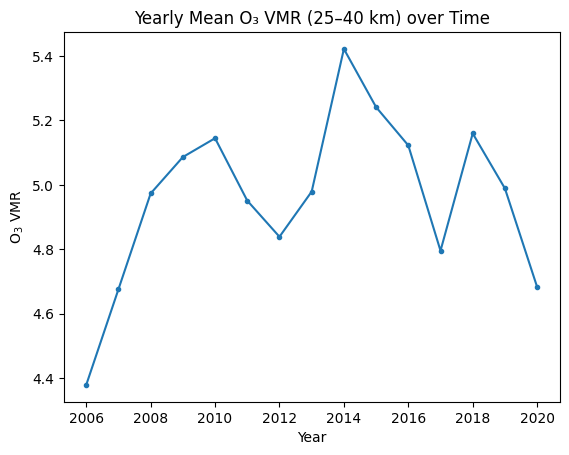

In [ ]:
has_fig = (O3_times.sel(altitude1 = slice(25, 40)).groupby("DATETIME.year").mean(dim = ["altitude1", "DATETIME"]) * 10**6).plot(marker = ".")
plt.xlabel("Year")
plt.ylabel("O$_3$ VMR")
plt.title("Yearly Mean O₃ VMR (25–40 km) over Time")

fig = plt.gcf()
axes = plt.gca()

title = axes.get_title()
fig.savefig(title, bbox_inches="tight")

In [ ]:
alt_boundaries = f["ALTITUDE.BOUNDARIES"][0]
lower_alt_bounds = alt_boundaries[1]
upper_alt_bounds = alt_boundaries[0]
alt_boundary_diffs = (upper_alt_bounds - lower_alt_bounds)
lower_alt_bounds = alt_boundaries[1].values
upper_alt_bounds = alt_boundaries[0].values

min_alt = 0
max_alt = 130
min_alt_bound = np.argmin(altitude1)
max_alt_bound = np.argmax(altitude1)
min_proportion = 0
max_proportion = 0
bottom_alt_bound = np.argmin(altitude1)
top_alt_bound = np.argmax(altitude1)
no_column = False

_min_lower_bounds = min(lower_alt_bounds)
_max_upper_bounds = max(upper_alt_bounds)

for i, (lower_bound, upper_bound) in enumerate(zip(lower_alt_bounds, upper_alt_bounds)):
    bound_diff = alt_boundary_diffs[i]
    if min_alt < _min_lower_bounds:
        pass
    elif lower_bound <= min_alt <= upper_bound:
        min_bound = upper_bound
        bottom_alt_bound = i-1
        min_proportion = (upper_bound - min_alt) / bound_diff
        min_alt_bound = i
    elif min_alt > _max_upper_bounds:
        no_column = True
        break
    if max_alt > _max_upper_bounds:
        pass
    elif lower_bound <= max_alt <= upper_bound:
        max_alt_bound = i
        top_alt_bound = i+1
        max_bound = lower_bound
        max_proportion = (max_alt - lower_bound) / bound_diff
    elif max_alt < _min_lower_bounds:
        no_column = True
        break

_top_slice = slice(max_alt_bound, top_alt_bound + 1)
_middle_slice = slice(min_alt_bound, max_alt_bound + 1)
_bottom_slice = slice(bottom_alt_bound, min_alt_bound + 1)

O3_column_top = (O3_density.isel(altitude1 = _top_slice) * alt_boundary_diffs.isel(altitude1 = _top_slice)) * max_proportion * 1000
O3_column = O3_density.isel(altitude1 = _middle_slice) * alt_boundary_diffs.isel(altitude1 = _middle_slice) * 1000
O3_column_bottom = (O3_density.isel(altitude1 = _bottom_slice) * alt_boundary_diffs.isel(altitude1 = _bottom_slice)) * min_proportion * 1000

_dim_name = "altitude1"
O3_partial_column = (O3_column_top.sum(dim = _dim_name) + O3_column.sum(dim = _dim_name) + O3_column_bottom.sum(dim = _dim_name)).where(not no_column, 0)

_conversion_factor = 2.687e20
O3_partial_column_DU = O3_partial_column / _conversion_factor

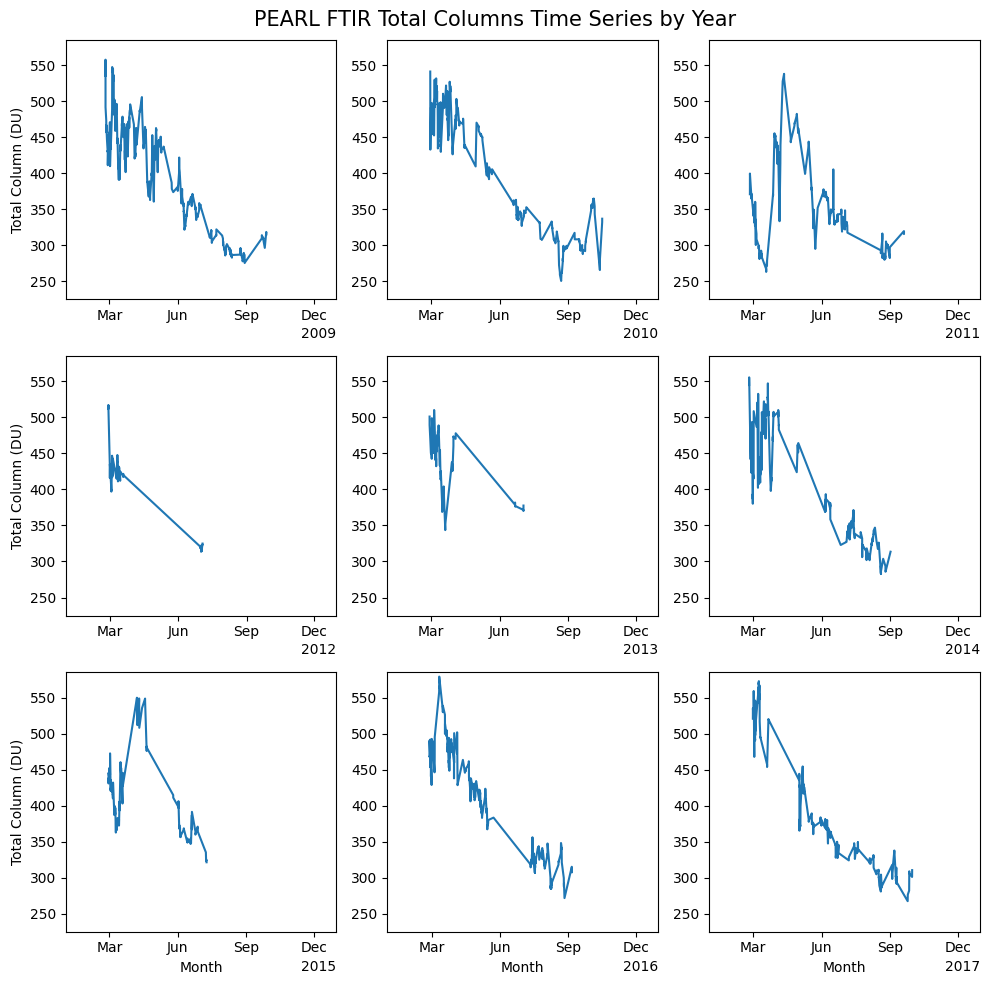

In [ ]:
import matplotlib.dates as mdates
from matplotlib.text import Text
fig, axes = plt.subplots(3,3, figsize = (10,10))
years = [str(year) for year in range(2009, 2018)]
for i, year in enumerate(years):
    flat_axes = axes.flatten()
    ax = flat_axes[i]
    data = O3_partial_column_DU.sel(DATETIME = slice(year + "-01-01", year + "-12-31"))
    data.plot(ax = ax)
    ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(3, 6, 9, 12)))
    ax.set_xlim(np.datetime64(year + '-01-01', 'ns'), np.datetime64(year + '-12-31', 'ns'))
    ax.set_ylim(225, 585)
    if ax in flat_axes[-3:]:
        ax.set_xlabel("Month")
    else:
        ax.set_xlabel("")
    if ax in flat_axes[::3]:
        ax.set_ylabel("Total Column (DU)")
    else:
        ax.set_ylabel("")

plt.suptitle(
    "PEARL FTIR Total Columns Time Series by Year", 
    fontsize=15,
    y=0.98
)

plt.tight_layout()

title = fig._suptitle.get_text()
fig.savefig(title, bbox_inches="tight")